# **Regression Multivariée**

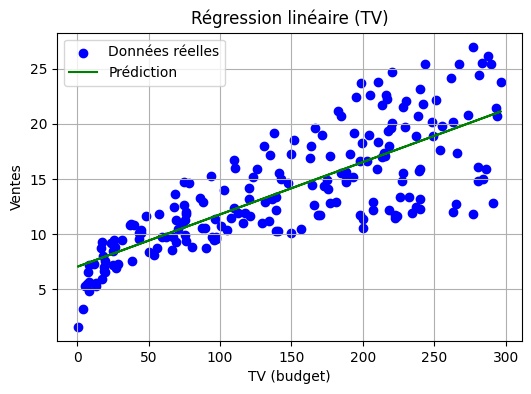

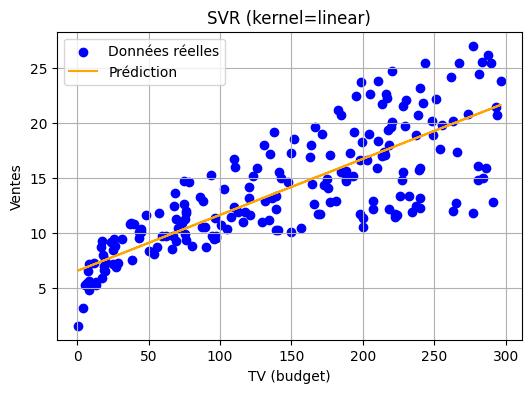

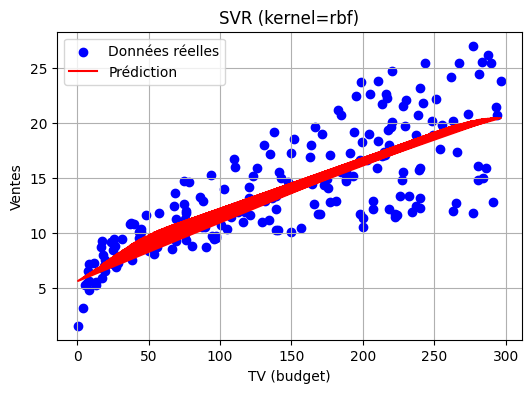

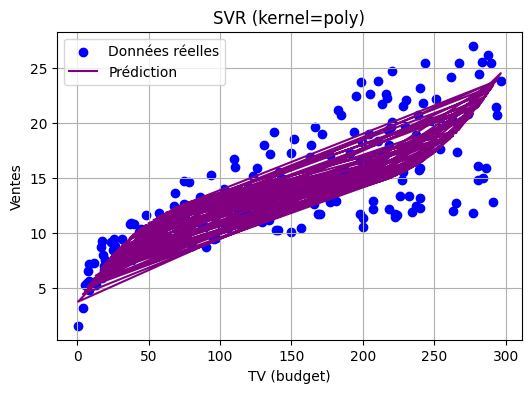

---- Évaluation RMSE ----
Régression linéaire (TV): 3.2423221486546887
SVR linear: 3.2546433943036606
SVR rbf: 3.211184597027507
SVR poly: 3.5553380625376017


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Chargement des données
df = pd.read_csv("Advertising.csv")

# === Univarié : TV uniquement ===
X_uni = df[['TV']].values
y = df['sales'].values

# Standardisation
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_uni_scaled = scaler_X.fit_transform(X_uni)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Régression linéaire univariée
lr_uni = LinearRegression()
lr_uni.fit(X_uni_scaled, y_scaled)
y_lr_uni_pred = lr_uni.predict(X_uni_scaled)
y_lr_uni_pred_inv = scaler_y.inverse_transform(y_lr_uni_pred.reshape(-1, 1)).ravel()

# SVR (linear)
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_uni_scaled, y_scaled)
y_svr_linear = svr_linear.predict(X_uni_scaled)
y_svr_linear_inv = scaler_y.inverse_transform(y_svr_linear.reshape(-1, 1)).ravel()

# SVR (rbf)
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_uni_scaled, y_scaled)
y_svr_rbf = svr_rbf.predict(X_uni_scaled)
y_svr_rbf_inv = scaler_y.inverse_transform(y_svr_rbf.reshape(-1, 1)).ravel()

# SVR (polynomial)
svr_poly = SVR(kernel='poly', degree=3)
svr_poly.fit(X_uni_scaled, y_scaled)
y_svr_poly = svr_poly.predict(X_uni_scaled)
y_svr_poly_inv = scaler_y.inverse_transform(y_svr_poly.reshape(-1, 1)).ravel()

# === Affichage ===

def plot_model(X, y_true, y_pred, title, color):
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y_true, label='Données réelles', color='blue')
    plt.plot(X, y_pred, label='Prédiction', color=color)
    plt.title(title)
    plt.xlabel("TV (budget)")
    plt.ylabel("Ventes")
    plt.legend()
    plt.grid()
    plt.show()

plot_model(X_uni, y, y_lr_uni_pred_inv, "Régression linéaire (TV)", "green")
plot_model(X_uni, y, y_svr_linear_inv, "SVR (kernel=linear)", "orange")
plot_model(X_uni, y, y_svr_rbf_inv, "SVR (kernel=rbf)", "red")
plot_model(X_uni, y, y_svr_poly_inv, "SVR (kernel=poly)", "purple")

# Évaluation
print("---- Évaluation RMSE ----")
print("Régression linéaire (TV):", np.sqrt(mean_squared_error(y, y_lr_uni_pred_inv)))
print("SVR linear:", np.sqrt(mean_squared_error(y, y_svr_linear_inv)))
print("SVR rbf:", np.sqrt(mean_squared_error(y, y_svr_rbf_inv)))
print("SVR poly:", np.sqrt(mean_squared_error(y, y_svr_poly_inv)))


# **Regression Multivariée**

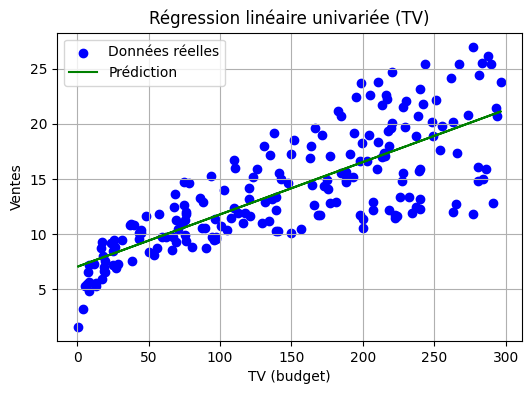

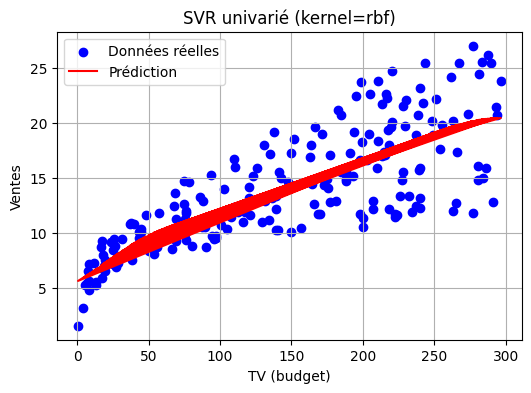

---- Évaluation RMSE ----
Régression linéaire univariée (TV): 3.242
SVR univarié (TV, rbf):            3.211
Régression linéaire multivariée:   1.669
SVR multivarié (rbf):              0.716


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Chargement des données
df = pd.read_csv("Advertising.csv")

# === Variable cible ===
y = df['sales'].values

# === Univarié : TV uniquement ===
X_uni = df[['TV']].values
scaler_X_uni = StandardScaler()
scaler_y_uni = StandardScaler()
X_uni_scaled = scaler_X_uni.fit_transform(X_uni)
y_scaled_uni = scaler_y_uni.fit_transform(y.reshape(-1, 1)).ravel()

# Régression linéaire univariée
lr_uni = LinearRegression()
lr_uni.fit(X_uni_scaled, y_scaled_uni)
y_lr_uni_pred = lr_uni.predict(X_uni_scaled)
y_lr_uni_pred_inv = scaler_y_uni.inverse_transform(y_lr_uni_pred.reshape(-1, 1)).ravel()

# SVR univarié
svr_uni_rbf = SVR(kernel='rbf')
svr_uni_rbf.fit(X_uni_scaled, y_scaled_uni)
y_svr_uni_rbf = svr_uni_rbf.predict(X_uni_scaled)
y_svr_uni_rbf_inv = scaler_y_uni.inverse_transform(y_svr_uni_rbf.reshape(-1, 1)).ravel()

# === Multivarié : TV, radio, newspaper ===
X_multi = df[['TV', 'radio', 'newspaper']].values
scaler_X_multi = StandardScaler()
scaler_y_multi = StandardScaler()
X_multi_scaled = scaler_X_multi.fit_transform(X_multi)
y_scaled_multi = scaler_y_multi.fit_transform(y.reshape(-1, 1)).ravel()

# Régression linéaire multivariée
lr_multi = LinearRegression()
lr_multi.fit(X_multi_scaled, y_scaled_multi)
y_lr_multi_pred = lr_multi.predict(X_multi_scaled)
y_lr_multi_pred_inv = scaler_y_multi.inverse_transform(y_lr_multi_pred.reshape(-1, 1)).ravel()

# SVR multivarié
svr_multi_rbf = SVR(kernel='rbf')
svr_multi_rbf.fit(X_multi_scaled, y_scaled_multi)
y_svr_multi_rbf = svr_multi_rbf.predict(X_multi_scaled)
y_svr_multi_rbf_inv = scaler_y_multi.inverse_transform(y_svr_multi_rbf.reshape(-1, 1)).ravel()

# === Affichage des graphes univariés ===
def plot_model(X, y_true, y_pred, title, color):
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y_true, label='Données réelles', color='blue')
    plt.plot(X, y_pred, label='Prédiction', color=color)
    plt.title(title)
    plt.xlabel("TV (budget)")
    plt.ylabel("Ventes")
    plt.legend()
    plt.grid()
    plt.show()

plot_model(X_uni, y, y_lr_uni_pred_inv, "Régression linéaire univariée (TV)", "green")
plot_model(X_uni, y, y_svr_uni_rbf_inv, "SVR univarié (kernel=rbf)", "red")

# === Évaluation RMSE ===
print("---- Évaluation RMSE ----")
print(f"Régression linéaire univariée (TV): {np.sqrt(mean_squared_error(y, y_lr_uni_pred_inv)):.3f}")
print(f"SVR univarié (TV, rbf):            {np.sqrt(mean_squared_error(y, y_svr_uni_rbf_inv)):.3f}")
print(f"Régression linéaire multivariée:   {np.sqrt(mean_squared_error(y, y_lr_multi_pred_inv)):.3f}")
print(f"SVR multivarié (rbf):              {np.sqrt(mean_squared_error(y, y_svr_multi_rbf_inv)):.3f}")
